In [49]:
from sklearn.cluster import KMeans

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from sklearn.datasets import make_blobs

In [52]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [53]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [54]:
df =pd.DataFrame(X,columns=['X_1','X_2'])
df

,X_1,X_2
0,-6.596339,-7.139015
1,-6.137532,-6.580817
2,5.198206,2.049175
3,-2.968559,8.164442
4,-2.768789,7.511143
...,...,...
995,-4.818124,-5.671743
996,-1.885078,9.642632
997,3.690480,4.605552
998,4.030367,1.786198


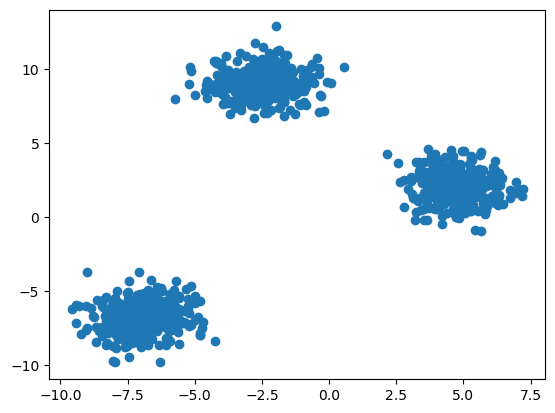

In [55]:
plt.scatter(df['X_1'],df['X_2'])

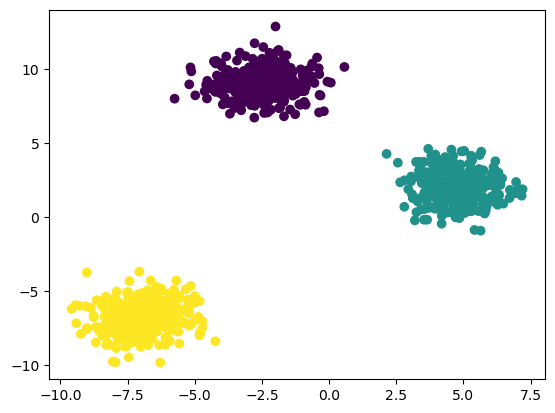

In [56]:
plt.scatter(df['X_1'],df['X_2'],c=y)

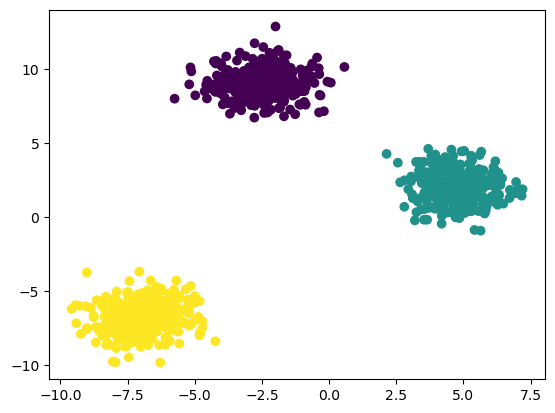

In [75]:
plt.scatter(X[:,0],X[:,1],c=y)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)


In [59]:
Model=KMeans(  n_clusters=3,init='k-means++')

In [60]:
Model.fit(X_train)

KMeans(n_clusters=3)

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
Model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [63]:
Model.score()

TypeError: _BaseKMeans.score() missing 1 required positional argument: 'X'

In [73]:
centroid =Model.cluster_centers_
centroid

array([[-6.87587318, -6.78134529],
       [-2.54083128,  9.0151129 ],
       [ 4.7314778 ,  2.03393209]])

In [65]:
Model.inertia_

1599.7085950090786

In [71]:
y_train_predict =Model.fit_predict(X_train)

y_train_predict 


array([2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0,
       2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2,

In [67]:

wcss = []

for i in range(1,11):
    model = KMeans(n_clusters = i,init='k-means++')
    model.fit(X_train)
    error = model.inertia_
    wcss.append(error)
    
print(wcss)

[52946.11684919719, 15369.674523316218, 1599.7085950090789, 1404.0600583089538, 1229.7072425483252, 1056.1734707441988, 924.97296805259, 824.1339424056571, 720.3566885324085, 657.9532047800542]


In [68]:
print(len(wcss))

10


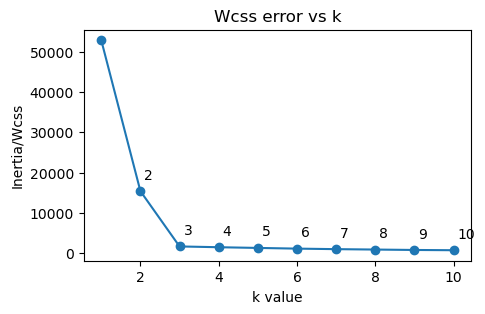

In [69]:
plt.figure(figsize=(5,3))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Wcss error vs k')
plt.xlabel('k value')
plt.ylabel('Inertia/Wcss')

for index,k_value in enumerate(range(1,11)):
    plt.annotate(k_value,xy=(k_value+0.1,wcss[index]+3000))
plt.show()

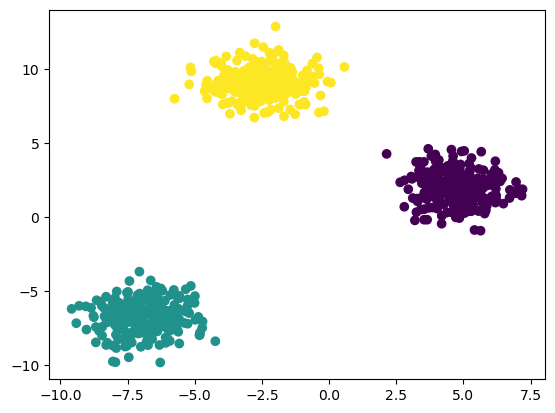

In [70]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train_predict)

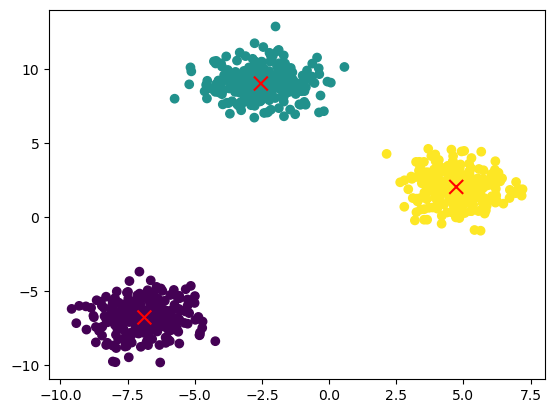

In [74]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train_predict)
plt.scatter(centroid[:,0],centroid[:,1],marker='x',s = [100]*3,c = 'r')
plt.show()

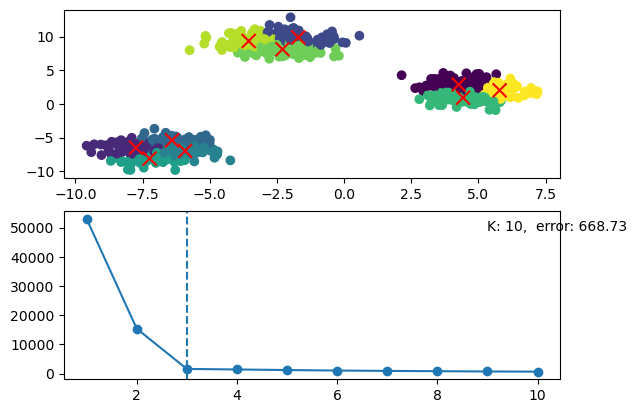

In [76]:
import time
wcss = []
plt.figure(figsize=(7,5))
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X_train)
    error = model.inertia_
    wcss.append(error)
    
    y_train_predict  =  model.fit_predict(X_train)
    y_train_predict
    
    
    plt.subplot(2,1,1)
    plt.scatter(X_train[:,0],X_train[:,1],c = y_train_predict)
    centroid = model.cluster_centers_
    plt.scatter(centroid[:,0],centroid[:,1],marker='x',s = [100]*i,c = 'r')
    
    
    plt.subplot(2,1,2)
    plt.plot(range(1,i+1),wcss,marker = 'o')
    
    plt.annotate(text= f'K: {i},  error: {round(error,2)}',xy = (i-1,wcss[0]-4000))
    plt.axvline(3,linestyle = '--')
    plt.show()
    
    display(clear=True)
    time.sleep(0.5)
    

In [77]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [78]:
wcss

[52946.116849197184,
 15369.674523316218,
 1599.7085950090786,
 1411.0659977157288,
 1219.835345057795,
 1042.531067238705,
 923.9344756647195,
 823.7421751779318,
 725.0164870048992,
 668.7333865492135]

In [82]:
x, y = dg.convex_decreasing()
kl = KneeLocator(range(1,11),wcss,curve="convex",direction='decreasing')
kl.plot_knee()

NameError: name 'dg' is not defined